In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
from datetime import datetime
import json
import pickle

In [188]:
levels = pd.read_csv('sp22-levels.csv')
levels.head()

advanced = levels[levels['level'] == 'advanced']
intermediate = levels[levels['level'] == 'intermediate']
beginner = levels[levels['level'] == 'beginner']

advanced.head()

,Unnamed: 0,okpy_id,level
2,2,71273,advanced
5,5,57313,advanced
37,37,71325,advanced
41,41,54050,advanced
59,59,71266,advanced


In [189]:
def get_assignment_df_level(level, temp1):
    temp = None
    if level == 'advanced':
        advanced_ids = list(advanced['okpy_id'])
        
        temp = temp1[[sid in advanced_ids for sid in temp1['student_id']]]
    
    elif level == 'intermediate':
        intermediate_ids = list(intermediate['okpy_id'])
        
        temp = temp1[[sid in intermediate_ids for sid in temp1['student_id']]]
    
    else:
        beginner_ids = list(beginner['okpy_id'])
        
        temp = temp1[[sid in beginner_ids for sid in temp1['student_id']]]
    
    return temp
    

In [206]:
name = 'lab02-sp22.csv' # edit this
sp22 = 'sp22' in name
columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
if sp22:
    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

assignment_df = pd.read_csv(name, usecols=[i for i in range(len(columns))]) # 2 is data
assignment_df.columns = columns

assignment_df = get_assignment_df_level('beginner', assignment_df)

assignment_df.head()

len(np.unique(assignment_df['student_id']))


289

In [207]:
def reject_outliers(data, m = 10.):
    print(len(data))
    d = np.abs(data - np.median(data))
    print(d)
    mdev = np.median(d)
    print(mdev)
    s = d/mdev if mdev else 0.
    return data[s<m]

def generate_num_attempts(name, questions, q):
    assignments = assignment_df.assignment.unique()
    assignment_now = 'cal/cs61a/sp22/lab02' # edit this 
    students = assignment_df.student_id.unique()
    
    is_assignment = assignment_df.assignment_id == assignment_now
    assignment_data = assignment_df[is_assignment]
    assignment_students = assignment_data.student_id.unique()
    
    name = 'lab02-sp22.csv'
    sp22 = 'sp22' in name

    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']
    if sp22:
        columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

    
    grading_students = assignment_df[assignment_df.message_type == 'grading'].student_id.unique()
    no_grading_students = [student for student in assignment_students if student not in grading_students]
    
    # compute number of attempts per question / edit questions here

    student = 21969
    num_attempts_per_question = {question: {student: 0 for student in grading_students} for question in questions}
    for student in grading_students:
        for row in assignment_df[(assignment_df.student_id == student) & (assignment_df.message_type == 'grading')].itertuples():
        
            data = json.loads(row.data)
            if len(list(data)) != 1:
                continue
            question = list(data)[0]
            if question in num_attempts_per_question:
                num_attempts_per_question[question][student] += 1
    
#     for q in questions:
#         temp = np.array(list(num_attempts_per_question[q].values()))
#         plt.figure()
#         print(q + " Number of Attempts Summary Statistics")
#         plt.hist(list(temp))
#         plt.show()
#         print(pd.DataFrame(temp).describe())
    temp = np.array(list(num_attempts_per_question[q].values()))
    print(len(temp))
    temp = reject_outliers(temp)
    plt.figure()
    print(q + " Number of Attempts Summary Statistics")
    plt.hist(list(temp))
    plt.show()
    temp_final = pd.DataFrame(temp)
    
    print(temp_final.describe())
    
    return temp_final
    

288
288
[  3.   3.   3.  60.   1.   7.   2.   2.   5.   0.   1.   2.   0.  27.
   2.  18.   3.   7.   3.   3.   2.   4.   5.   2.   5.  18.  15.   3.
   1.   5.   2.   3.   9.   2.   3.   2.   1.   1.   2.   5.   2.  14.
   3.   1.   2.   2.   3.   1.   3.   3.   1.   3.   1.   3.   5.   0.
   3.   2.   3.   1.   1.   2.   9.   1.   1.  11.   5.   1.   2.  12.
  26.   6.  17.   9.   1.   9.   2.   3.   3.   3.   1.   2.   1.  11.
   2.   3.   3.  27.   2.   3.   2.   1.   3.   3.   1.   2.   7.   1.
   3.   7.   2.   2.   3.   3.   2.   1.   1.   2.   3.  19.   3.   6.
   0.   3.   3.   0.   2.   0.   1.  14.   7.   2.   8.  17.   2.   3.
   3.   1.   3.   0.   4.   1.   7.   3.   3.   3.  11.   1.   5.   2.
  26.   2.   3.   2.   1.   2.   3.  17.  12.  64.   3.  18.   2.   3.
   1.   2.   1.   1.  22.   1.  17.  25.  24.   0.   1.   1.   1.   3.
   2.   4.   5.  15.   2.   7.   9.   5.   1.   1.   0.   0.   0.   2.
   1.   0.   3.   3.  12.   2.  13.   1.  12.   1.   6.   2.   3.  19

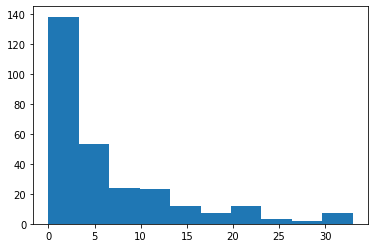

                0
count  281.000000
mean     6.679715
std      7.254844
min      0.000000
25%      2.000000
50%      4.000000
75%      9.000000
max     33.000000


,0
0,1
1,7
2,1
3,5
4,11
...,...
276,13
277,30
278,9
279,2


In [211]:
generate_num_attempts('lab02-sp22.csv', ['Lambda the Free', 'Higher Order Functions', 'hop', 'digit_index_factory', 'lambda_curry2', 'count_cond'], 'digit_index_factory')

In [112]:
def bucket_diffs(timestamps):
    num_buckets = 0

    if len(timestamps) <= 1:
        return None
    
    result, timestamps = [], list(timestamps)
    
    initial_timestamp = parser.parse(timestamps[0])
    
    for i in range(len(timestamps) - 1):
        current_timestamp = parser.parse(timestamps[i])
        next_timestamp = parser.parse(timestamps[i + 1])
        time_temp = (next_timestamp - current_timestamp).total_seconds() / 3600
        
        
        if time_temp >= 1.2:
            num_buckets += 1
            temp_time_to_add = (current_timestamp - initial_timestamp).total_seconds() / 3600
            
            initial_timestamp = next_timestamp
            result.append(temp_time_to_add)
    
    if parser.parse(timestamps[-1]) != initial_timestamp:
        time_temp = (parser.parse(timestamps[-1]) - initial_timestamp).total_seconds() / 3600
        result.append(time_temp)
    
    return result
            

In [139]:
def generate_total_time_spent(name):
    
    buckets_all_students = assignment_df.groupby('student_id')['timestamp'].agg(bucket_diffs)
    
    bucket_times = [sum(bucket_list) for bucket_list in list(buckets_all_students) if bucket_list != None]
    
    plt.hist(bucket_times)
    
    print(pd.DataFrame(bucket_times).describe())


In [140]:
generate_total_time_spent('lab02-sp21.csv')

UnboundLocalError: local variable 'assignment_df' referenced before assignment

count_cond Number of Attempts Summary Statistics


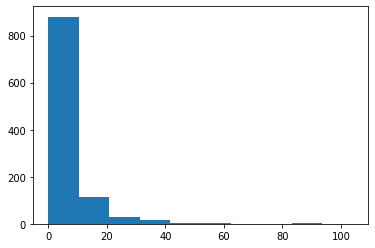

                 0
count  1045.000000
mean      6.085167
std       8.867664
min       0.000000
25%       1.000000
50%       3.000000
75%       7.000000
max     104.000000


In [8]:
# t test 
sp_22 = generate_num_attempts('lab02-sp22.csv', ['Lambda the Free', 'Higher Order Functions', 'hop', 'digit_index_factory', 'lambda_curry2', 'count_cond'], 'count_cond')

In [9]:
print(sp_22)

      0
0     0
1     2
2     0
3     0
4     0
...  ..
1040  1
1041  3
1042  5
1043  0
1044  1

[1045 rows x 1 columns]


In [10]:
list(sp_22[0])

[0,
 2,
 0,
 0,
 0,
 1,
 0,
 16,
 2,
 8,
 0,
 3,
 1,
 13,
 1,
 3,
 4,
 14,
 2,
 4,
 2,
 15,
 6,
 2,
 6,
 1,
 4,
 2,
 3,
 5,
 1,
 3,
 6,
 12,
 8,
 1,
 2,
 3,
 7,
 1,
 6,
 1,
 14,
 1,
 6,
 6,
 4,
 0,
 1,
 1,
 0,
 2,
 19,
 23,
 2,
 22,
 12,
 4,
 19,
 1,
 1,
 15,
 1,
 7,
 12,
 1,
 1,
 1,
 3,
 11,
 8,
 1,
 4,
 6,
 4,
 4,
 5,
 22,
 4,
 2,
 2,
 21,
 7,
 1,
 2,
 5,
 5,
 3,
 2,
 2,
 3,
 12,
 2,
 0,
 6,
 0,
 1,
 1,
 12,
 12,
 2,
 3,
 8,
 4,
 0,
 8,
 1,
 7,
 7,
 7,
 2,
 3,
 15,
 10,
 12,
 9,
 0,
 4,
 9,
 1,
 8,
 9,
 1,
 0,
 1,
 3,
 16,
 13,
 0,
 2,
 6,
 5,
 2,
 2,
 6,
 1,
 3,
 4,
 4,
 5,
 0,
 1,
 4,
 7,
 4,
 15,
 14,
 6,
 4,
 32,
 1,
 1,
 14,
 2,
 7,
 6,
 3,
 7,
 2,
 18,
 0,
 5,
 12,
 21,
 16,
 5,
 1,
 14,
 6,
 14,
 2,
 2,
 4,
 5,
 1,
 1,
 2,
 3,
 1,
 7,
 3,
 6,
 2,
 1,
 7,
 8,
 6,
 6,
 3,
 1,
 3,
 3,
 2,
 4,
 3,
 1,
 7,
 0,
 13,
 1,
 6,
 9,
 1,
 2,
 31,
 21,
 3,
 8,
 90,
 6,
 4,
 1,
 1,
 14,
 1,
 2,
 10,
 4,
 8,
 0,
 1,
 2,
 10,
 4,
 17,
 8,
 2,
 3,
 0,
 20,
 7,
 8,
 7,
 50,
 17,
 3,
 2,
 4,
 15

In [19]:
sp_22.to_pickle("./sp_22.pkl")  